# Ficha #05 - Criação automática das máscaras do dataset DRIVE

**Objectivo**: Neste trabalho usando as técnicas que julgar mais adequadas deve gerar automaticamente as máscaras do conjunto de imagens do DRIVE. A máscara permite extrair a zona central de interesse da image de fundo de olho. Na validação do seu trabalho deve sobrepor vários perfis de intensidade da máscara e da imagem de fundo de olho na direcção horizontal como na vertical.

In [94]:
%pylab inline
import sys
sys.path.append('/usr/lib/python3.6/site-packages')
import cv2
import scipy.ndimage
import numpy as np

from scipy import signal
from skimage.filters import threshold_otsu



Populating the interactive namespace from numpy and matplotlib


In [95]:
def grad(img):
    kernel = np.matrix('0 1 0;1 -4 1; 0 1 0')
    grad = signal.correlate2d(img, kernel, boundary='symm', mode='same')
    return grad

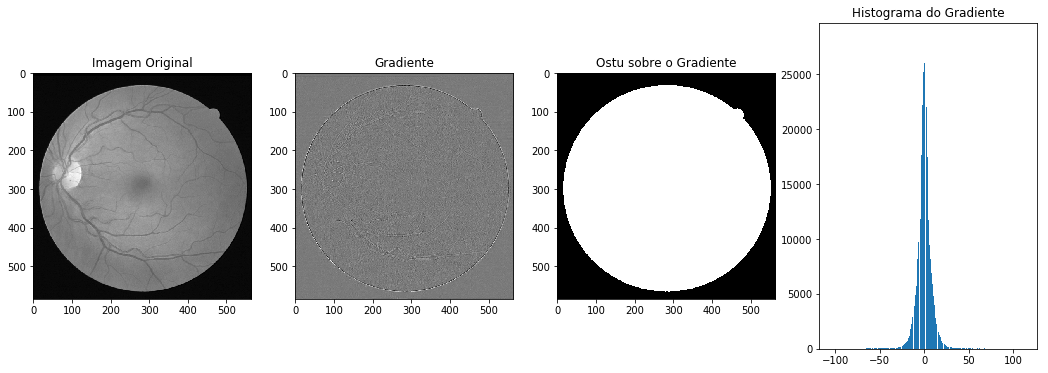

In [126]:
def grad(img):
    kernel = np.matrix('0 1 0;1 -4 1; 0 1 0')
    grad = signal.correlate2d(img, kernel, boundary='symm', mode='same')
    return grad

path = "DRIVE/test/images/"
img = cv2.imread(path+"01_test.tif",0)
gray()

grad = grad(img)

global_thresh = threshold_otsu(img)
otsu = img > global_thresh

_,ax=subplots(1,4,figsize=(18,6))

ax[0].set_title('Imagem Original')
ax[0].imshow(img)

ax[1].set_title('Gradiente')
ax[1].imshow(grad)

ax[2].set_title('Ostu sobre o Gradiente')
ax[2].imshow(otsu, cmap=plt.cm.gray)

ax[3].set_title('Histograma do Gradiente')
plt.hist(grad.ravel(),256)
plt.show()